# Support Vector Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Support Vector Classifier (SVC)


In [ ]:
np.random.seed(0)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 0, 0, 1, 1, 1])

clf = svm.SVC(kernel='linear')
clf.fit(X, y)
print(clf.n_support_)
xx, yy = np.meshgrid(np.linspace(0, 7, 500), np.linspace(0, 8, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with SVM Decision Boundary')
plt.show()

## SVC - Different kernels

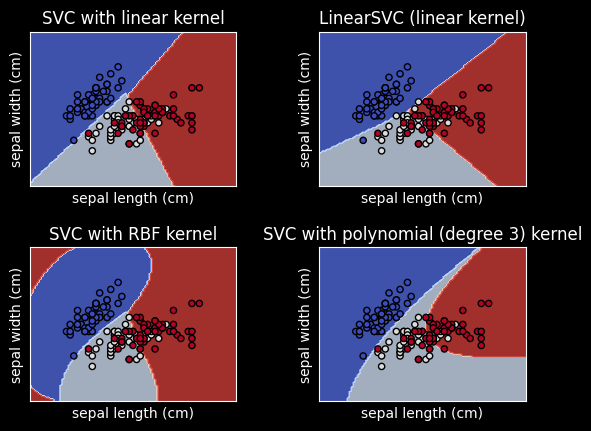

In [1]:
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()